In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
data = pd.read_csv("WA_Fn-UseC_-Marketing-Campaign-Plan_-GroceryS.csv", index_col="storeid")

In [113]:
data.head()

,HealthyStore,StoreSize,StoreLayout,customerID,gender,WhoShoppingFor,Vegetarian,ShoppingStyle,CouponUser,week,CouponSequence,CarryOver,CouponValue,AmountSpent
storeid,,,,,,,,,,,,,,
1,Regular store,Medium,No emphasis,6193-QDKCN,Male,Self and spouse,No,Often; what's on sale,From newspaper,1,"2,4,1,3",0,05 percent,135.24
1,Regular store,Medium,No emphasis,6193-QDKCN,Male,Self and spouse,No,Often; what's on sale,From newspaper,2,"2,4,1,3",2,25 percent,128.65
1,Regular store,Medium,No emphasis,6193-QDKCN,Male,Self and spouse,No,Often; what's on sale,From newspaper,3,"2,4,1,3",4,00 No value,112.86
1,Regular store,Medium,No emphasis,6193-QDKCN,Male,Self and spouse,No,Often; what's on sale,From newspaper,4,"2,4,1,3",1,15 percent,130.14
1,Regular store,Medium,No emphasis,9245-DEZSB,Male,Self and family,No,Weekly; similar items,From mailings,1,"4,3,2,1",0,25 percent,155.61


In [114]:
num_rows = data.shape[0]
num_cols = data.shape[1]

In [115]:
num_rows, num_cols

(1496, 14)

In [116]:
data.describe()

,week,CarryOver,AmountSpent
count,1496.000000,1496.000000,1496.000000
mean,2.500000,1.870989,118.494820
std,1.118408,1.451582,55.197293
min,1.000000,0.000000,0.000000
25%,1.750000,0.750000,96.810000
50%,2.500000,2.000000,118.860000
75%,3.250000,3.000000,140.955000
max,4.000000,4.000000,353.760000


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1496 entries, 1 to 60
Data columns (total 14 columns):
HealthyStore      1496 non-null object
StoreSize         1496 non-null object
StoreLayout       1496 non-null object
customerID        1496 non-null object
gender            1496 non-null object
WhoShoppingFor    1496 non-null object
Vegetarian        1496 non-null object
ShoppingStyle     1496 non-null object
CouponUser        1496 non-null object
week              1496 non-null int64
CouponSequence    1496 non-null object
CarryOver         1496 non-null int64
CouponValue       1496 non-null object
AmountSpent       1496 non-null float64
dtypes: float64(1), int64(2), object(11)
memory usage: 175.3+ KB


In [118]:
no_missing_cols = set(data.columns[data.isnull().mean() == 0])

In [119]:
cols_missing_greater_0 = set(data.columns[data.isnull().mean() < 100])

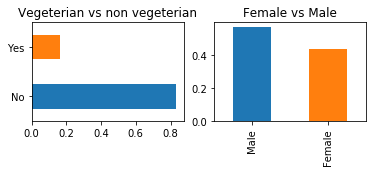

In [207]:
plt.subplot(2, 2, 1)
vegeterian_ratio = data.Vegetarian.value_counts()
(vegeterian_ratio/data.shape[0]).plot(kind="barh");
plt.title("Vegeterian vs non vegeterian")

plt.subplot(2, 2, 2)
genre_ratio = data.gender.value_counts()
(genre_ratio/data.shape[0]).plot(kind="bar");
plt.title("Female vs Male");

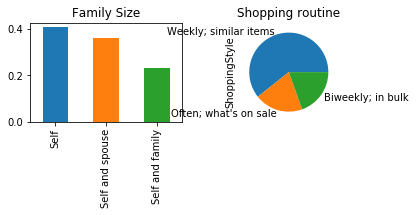

In [209]:
plt.subplot(2, 2, 3)
shopping_size = data.WhoShoppingFor.value_counts()
(shopping_size/data.shape[0]).plot(kind="bar");
plt.title("Family Size")

plt.subplot(2, 2, 4)
ShoppingStyle = data.ShoppingStyle.value_counts()
(ShoppingStyle/data.shape[0]).plot(kind="pie");
plt.title("Shopping routine");


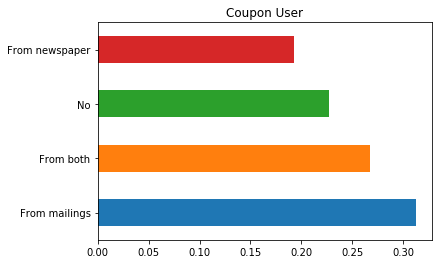

In [204]:
CouponUser = data.CouponUser.value_counts()
(CouponUser/data.shape[0]).plot(kind="barh");
plt.title("Coupon User");

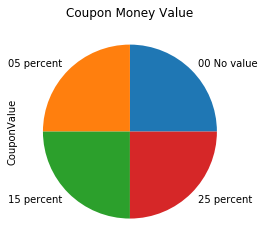

In [205]:
CouponValue = data.CouponValue.value_counts()
(CouponValue/data.shape[0]).plot(kind="pie");
plt.title("Coupon Money Value");

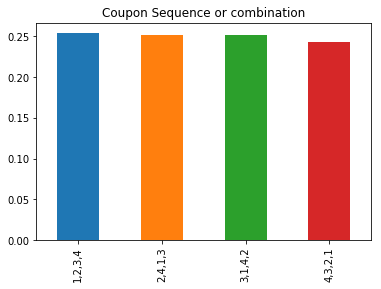

In [206]:
CouponSequence = data.CouponSequence.value_counts()
(CouponSequence/data.shape[0]).plot(kind="bar");
plt.title("Coupon Sequence or combination");